# Support Vector Machine (SVM)

一直以來，SVM就是資料科學中最受歡迎的分類演算法之一。

無論是小數據的運用(和深度學習需要大數據Big Data在背後支援不同)；非線性可分(non-linear separability)的問題；高維模式識別問題上(醫學、圖像辨識…)，SVM都有不錯的表現。

其概念是建構一個超平面(hyperplane)，讓資料在空間中能夠被區分成兩類，所以又被稱為二元分類器(binary classifier)。

在二維的空間中，超平面指的就是「一條線」；三維空間中，則是「一個平面」；之所以有一個「超」字，是因為資料往往不會只有二維、三維。在更高維的空間中，我們無法觀察這個平面的形狀為何，於是就用「超平面(hyperplane)」一詞來概括。


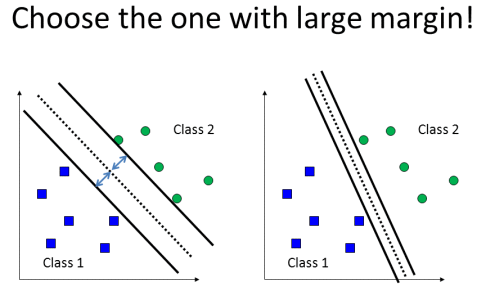

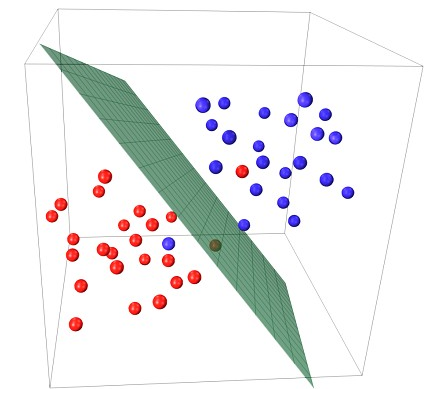

## Importing the libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [44]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [45]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [46]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 透過散點圖確認特徵和購買與否的分布關係決定要採用哪一種核函數(kernel trick)

0, 1 分佈散落在兩端，pattern 具備線性可分，所以採用 linear kernel 較合適

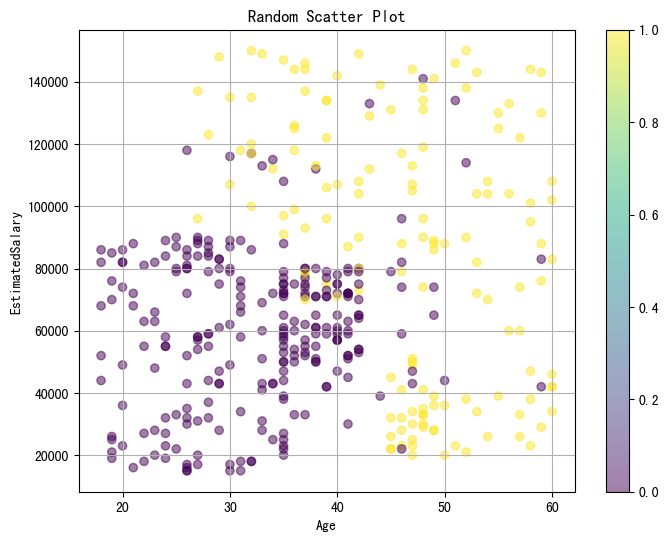

In [81]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(dataset["Age"], dataset["EstimatedSalary"], c=dataset["Purchased"] ,  alpha=0.5)

plt.colorbar(scatter)  # Show color scale
plt.title('Random Scatter Plot')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.grid(True)
plt.show()

## Splitting the dataset into the Training set and Test set

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
print(X_train)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

In [50]:
print(y_train)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


In [51]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


## Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
print(X_train)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

In [54]:
print(X_test)

[[-7.98950822e-01  4.94607583e-01]
 [-2.12648508e-02 -5.77359062e-01]
 [-3.12897090e-01  1.46942725e-01]
 [-7.98950822e-01  2.62831011e-01]
 [-3.12897090e-01 -5.77359062e-01]
 [-1.09058306e+00 -1.44652121e+00]
 [-7.01740076e-01 -1.59138156e+00]
 [-2.15686344e-01  2.14601566e+00]
 [-1.96547978e+00 -5.58617754e-02]
 [ 8.53631867e-01 -7.80163563e-01]
 [-7.98950822e-01 -6.06331134e-01]
 [-9.93372315e-01 -4.32498705e-01]
 [-1.18475597e-01 -4.32498705e-01]
 [ 7.59458956e-02  2.04886868e-01]
 [-1.77105829e+00  4.65635512e-01]
 [-6.04529329e-01  1.36376973e+00]
 [-1.18475597e-01  2.04886868e-01]
 [-1.86826903e+00  4.36663440e-01]
 [ 1.63131784e+00  1.74040666e+00]
 [-3.12897090e-01 -1.38857706e+00]
 [-3.12897090e-01 -6.64275277e-01]
 [ 8.53631867e-01  2.14601566e+00]
 [ 2.70367388e-01 -5.48386991e-01]
 [ 8.53631867e-01  1.01610487e+00]
 [-1.47942605e+00 -1.21474464e+00]
 [ 1.04805336e+00  2.05909944e+00]
 [-9.93372315e-01  4.94607583e-01]
 [-8.96161568e-01  2.91803083e-01]
 [-1.18475597e-01 -2

## Training the SVM model on the Training set

In [55]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting a new result

In [56]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [57]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[57  1]
 [ 6 16]]


0.9125

## Visualising the Training set results

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_64120\301182806.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


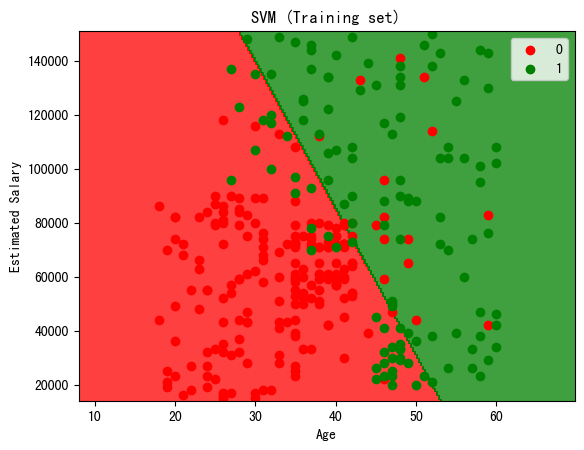

In [59]:
from matplotlib.colors import ListedColormap
# 逆轉換回原本的數據
X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\sunny_weng\AppData\Local\Temp\ipykernel_64120\2598045604.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


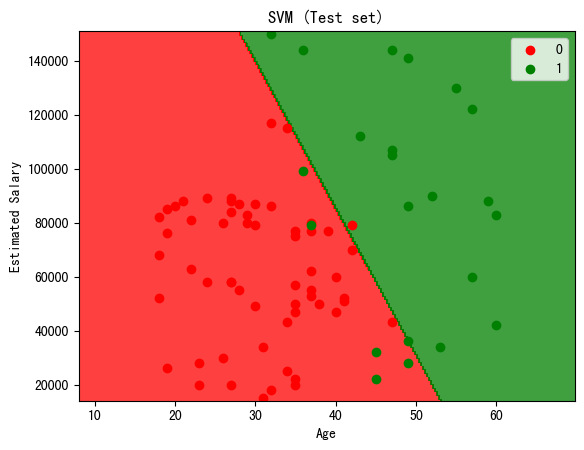

In [60]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## SVM 中的可調參數

[sklearn SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

- cost
- epsilon (SVR)
- kernel
- gamma





## C (cost)

一開始的SVM，是要尋找一個能夠完美將「所有」資料分成兩邊，具有最大margin的超平面，這又被稱為“hard-margin SVM”。

但由於hard-margin SVM，追求要將資料完美分好，因此很容易有overfitting的風險。於是1995年，Vapnik等人提出了“soft-margin SVM”，讓SVM能容許一些被分錯的資料存在。

在soft-margin SVM的損失函數(loss function)中，這個大C的存在，就是容錯項。

藉由C，我們能給予那些被分錯的資料懲罰值，控制support vectors(用來決定超平面的那些資料點)的影響力。


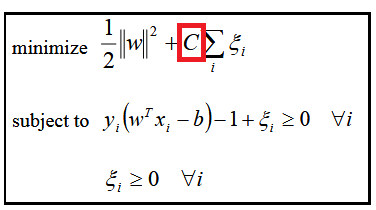


- C越大，代表容錯越小，越少support vectors，越接近hard-margin SVM的概念，卻容易overfitting

- C越小，代表容錯越大，越多support vectors，可以追求更大的margin


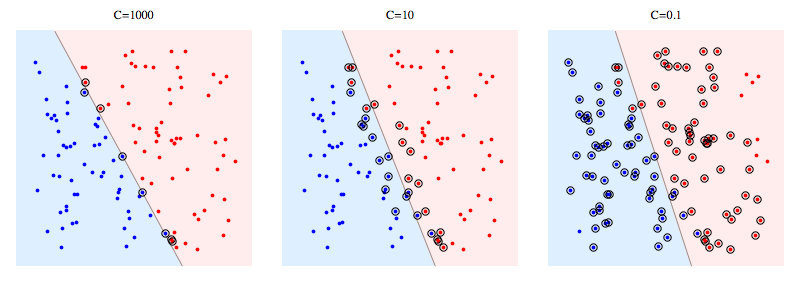

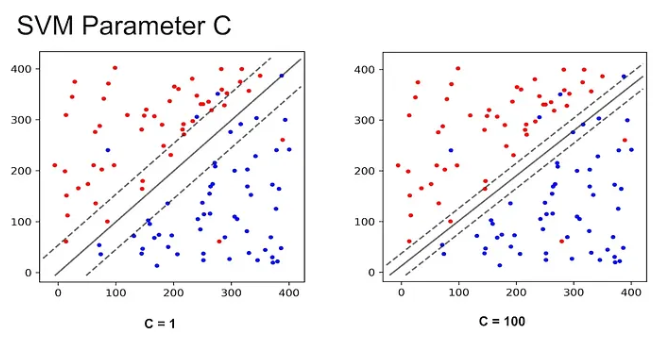


當C=1000時，support vectors的點幾乎都發生在線上面，很接近hard-margin SVM的概念。

當C越來越小，隨著support vectors的點越來越多，表示margin的範圍越來越大。

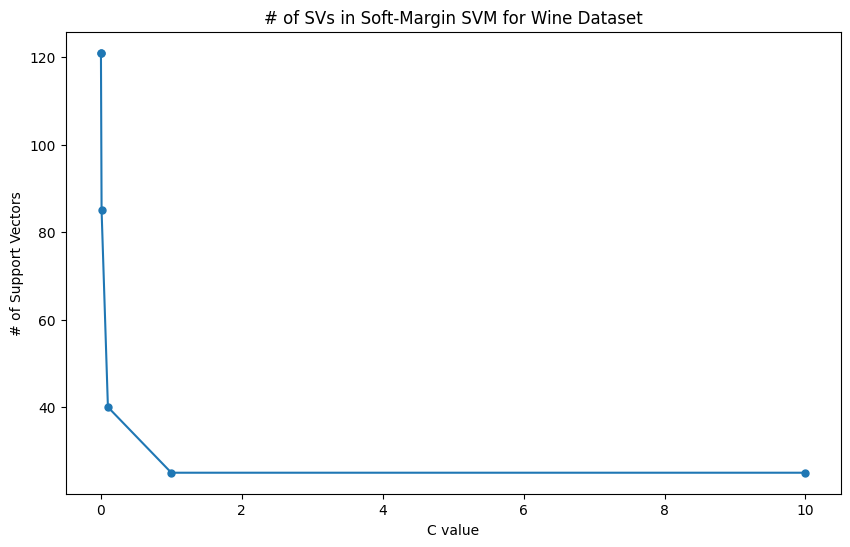

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 加載數據
data = load_wine()
X = data.data
y = data.target

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 初始化儲存支持向量數量的列表
num_SV = []
Cs = [0.0001, 0.001 , 0.01, 0.1, 1, 10]  # C值從1到101，確保包括100

# 計算不同C值對應的支持向量數量
for C in Cs:
    svm_model = SVC(C=C, kernel='linear')
    svm_model.fit(X_train, y_train)
    num_SV.append(svm_model.n_support_.sum())  # 獲取支持向量的總數

# 繪圖
plt.figure(figsize=(10, 6))
plt.plot(Cs, num_SV, marker='o', linestyle='-', markersize=5)
plt.xlabel('C value')
plt.ylabel('# of Support Vectors')
plt.title('# of SVs in Soft-Margin SVM for Wine Dataset')
plt.show()


## 支持向量機（SVM）Kernel 選擇

## Goal: 核函數使得數據在 SVM 中線性可分

在支持向量機的應用中，核函數的選擇關鍵影響數據的轉換和分類效果。以下是幾種常用的核函數及其適用情況：

- 線性核（Linear Kernel）<br>
線性核是形式最簡單的核函數，表示為 `K(x, x') = x^T x'`。它適用於數據集在原始空間中是線性可分的情況，具有計算效率高和模型解釋性強的特點。

- 多項式核（Polynomial Kernel）<br>
多項式核的表達式為 `K(x, x') = (γx^T x' + r)^d`，其中 `d` 是核的度數，`γ` 和 `r` 是可調參數。這種核通過引入非線性映射，適合於處理複雜的`非線性`分類問題。

- 徑向基函數核（RBF Kernel）<br>
徑向基函數核，或稱高斯核，其形式為 `K(x, x') = exp(-γ||x - x'||^2)`，其中 `γ` 控制核的寬度。RBF核非常靈活，適合捕捉數據中的複雜`非線性`關係。

- Sigmoid核（Sigmoid Kernel）<br>
Sigmoid核的形式為 `K(x, x') = tanh(γx^T x' + r)`。雖然在SVM中較少使用，但它源自神經網絡的激活函數，適用於特定的`非線性`問題。

核函數的選擇應根據數據的特性和分類問題的需求來進行，並通常需要進行多次實驗和交叉驗證以確定最適合的選擇。


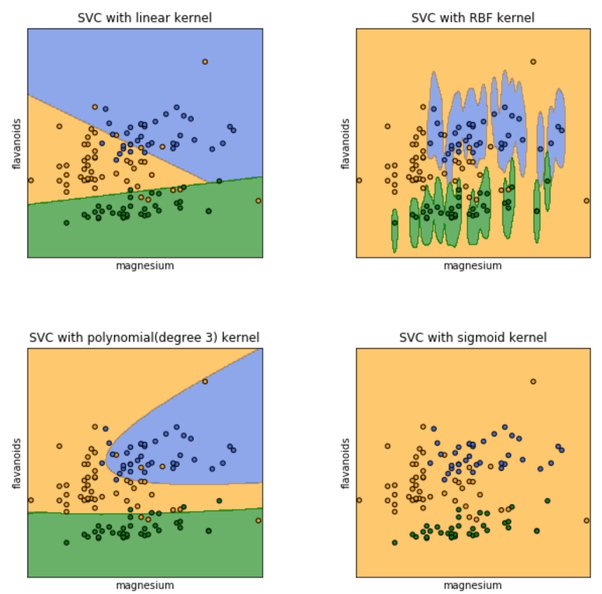

## Gamma

這是用在kernel function中的參數，主要是polynomial、radial basis(RBF)和sigmoid。

這邊有不同kernel function的優劣討論，可以事先讀一下。

Gamma的意義比較難以說明，當使用kernel function將原始資料映射到特徵空間(feature space)時，它隱含地決定了資料在特徵空間的分佈狀況。

以幾何的觀點來看，當gamma增加時，會讓Radial Basis Function(RBF)裡面的σ變小，而σ很小的高斯分佈會又高又瘦，讓只在附近的資料點有所作用。(參考)

在定義中，Gamma = How far the influence of a single training example reaches，意思是：

- gamma大，資料點的影響力範圍比較近，對超平面來說，近點的影響力權重較大，容易勾勒出擬合近點的超平面，也容易造成overfitting。

- gamma小，資料點的影響力範圍比較遠，對超平面來說，較遠的資料點也有影響力，因此能勾勒出平滑、近似直線的超平面。

gamma 正比 1/σ

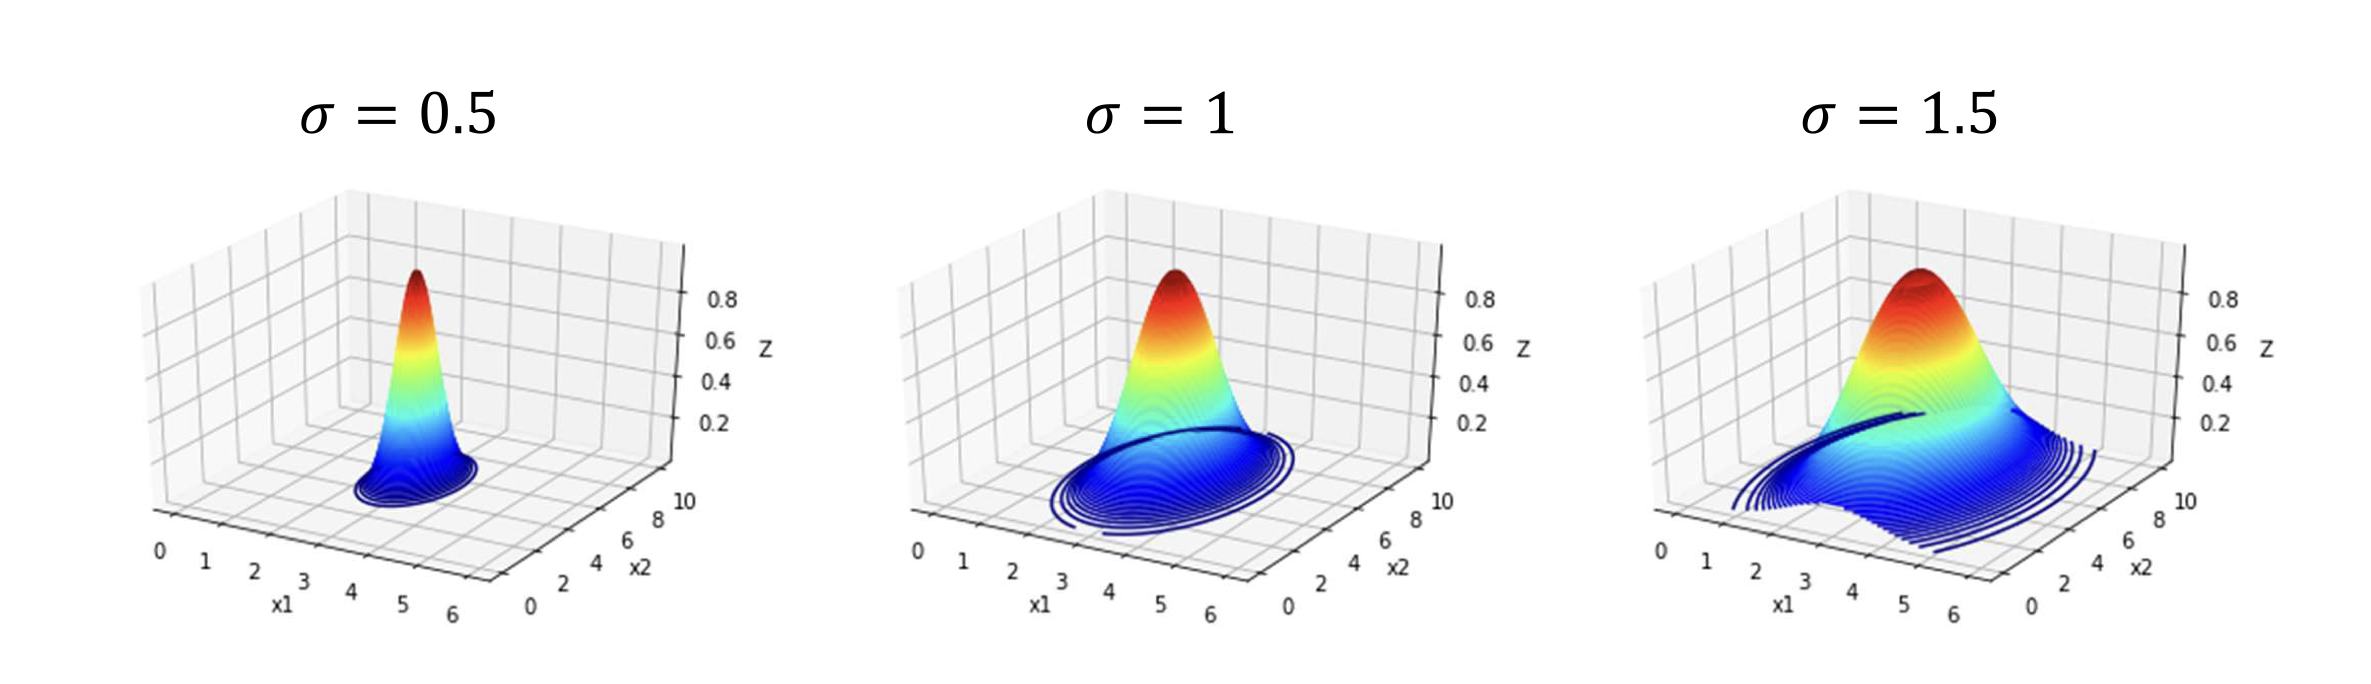
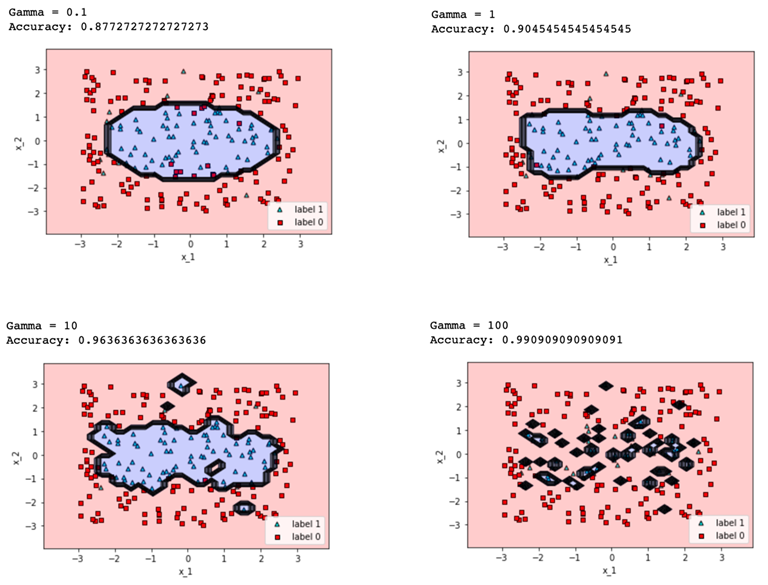

Text(0.5, 1.0, 'Original Data')

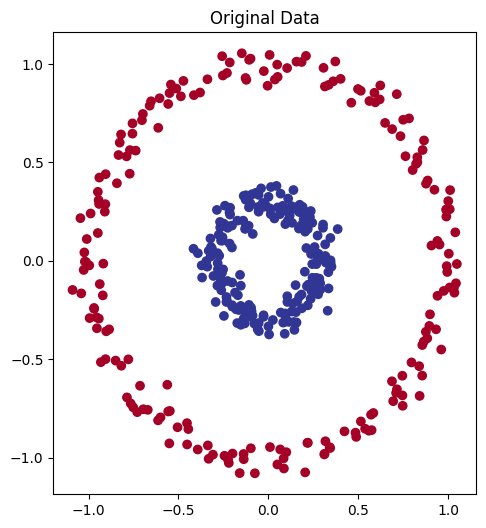

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# 建立假數據
# 生成同心圆数据
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# 可视化原始数据
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Original Data")

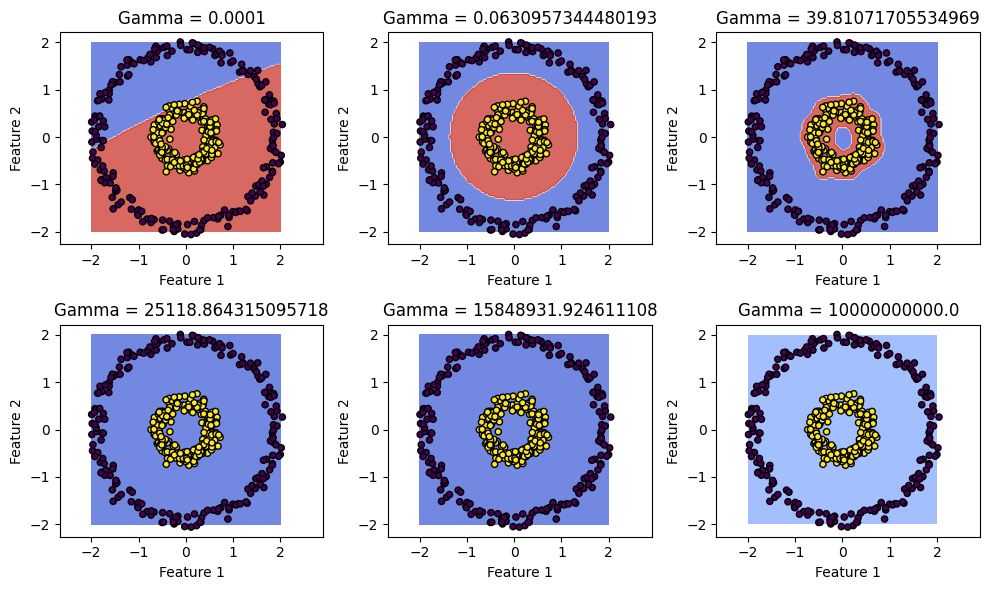

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 生成数据
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 定义gamma值
gamma_values = np.logspace(-4, 10, 6).tolist()  # 创建不同的gamma值

# 绘图设置
fig, ax = plt.subplots(2, 3, figsize=(10, 6))  # 注意：figsize 调整为更合适的尺寸

# 绘制每个gamma值的决策边界
for i, gamma in enumerate(gamma_values):
    # 训练模型
    svc = SVC(kernel='rbf', gamma=gamma)
    svc.fit(X_scaled, y)

    # 创建网格来绘制决策边界
    X1, X2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    Z = svc.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # 找到对应的子图位置
    row = i // 3
    col = i % 3

    # 绘制决策边界和数据点
    ax[row, col].contourf(X1, X2, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax[row, col].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=20, edgecolor='k')
    ax[row, col].set_title(f'Gamma = {gamma}')
    ax[row, col].set_xlabel('Feature 1')
    ax[row, col].set_ylabel('Feature 2')
    ax[row, col].axis('equal')

plt.tight_layout()
plt.show()




## 探討不同的gamma值對於SVM中support vector的影響

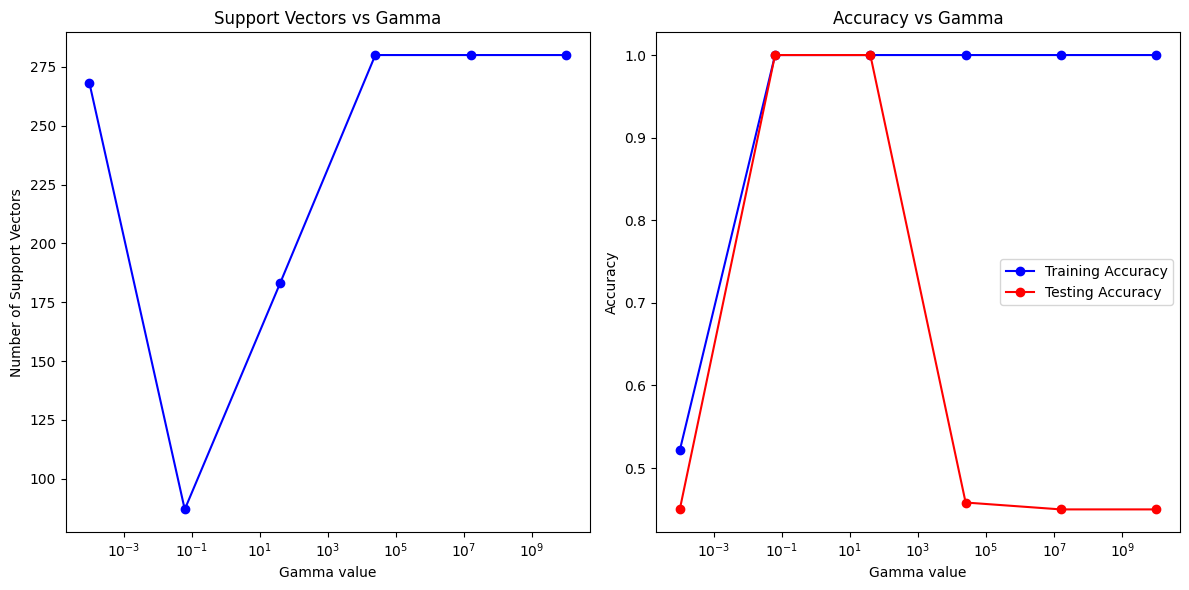

In [25]:
num_SV = []
train_accuracies = []
test_accuracies = []

# 计算不同gamma值对应的支持向量数量和准确度
for gamma in gamma_values:
    svm_model = SVC(kernel='rbf', gamma=gamma)
    svm_model.fit(X_train, y_train)
    num_SV.append(svm_model.n_support_.sum())  # 获取支持向量的总数

    # 计算训练集和测试集的准确度
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# 绘图
plt.figure(figsize=(12, 6))

# 支持向量数量随gamma的变化
plt.subplot(1, 2, 1)
plt.semilogx(gamma_values, num_SV, marker='o', linestyle='-', color='b')
plt.xlabel('Gamma value')
plt.ylabel('Number of Support Vectors')
plt.title('Support Vectors vs Gamma')

# 准确度随gamma的变化（训练集和测试集）
plt.subplot(1, 2, 2)
plt.semilogx(gamma_values, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.semilogx(gamma_values, test_accuracies, marker='o', linestyle='-', color='r', label='Testing Accuracy')
plt.xlabel('Gamma value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Gamma')
plt.legend()

plt.tight_layout()
plt.show()